# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta


### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.dropna()

In [ ]:
df_data.isnull().values.any()

True

In [ ]:
df_data.duplicated().values.any()

False

## Descriptive Statistics

In [4]:
df_data=df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
data = df_data.groupby('Organisation').count()
data.head()


,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Organisation,,,,,,
AEB,3,3,3,3,0,3
AMBA,8,8,8,8,0,8
ASI,9,9,9,9,0,9
Arianespace,279,279,279,279,96,279
Arm??e de l'Air,4,4,4,4,0,4


In [ ]:
fig = px.bar(x=data.index,y=data.Location,color=data.Location)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
mission = df_data['Mission_Status'].value_counts()
mission


Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
df_data['Mission_Status'].value_counts().sum()

4324

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
fig = px.bar(x=mission.index,y=mission.values,color=mission.values,text=mission.values)
fig.update_layout(
    title="Mission Status",
    xaxis_title="Status",
    yaxis_title="Number",)
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [10]:
df_data = df_data.replace(['5,000.0'],'5000.0')
df_data = df_data.replace(['1,160.0'],'1160.0')                                      

In [11]:
df_data['Price'] = pd.to_numeric(df_data['Price'])

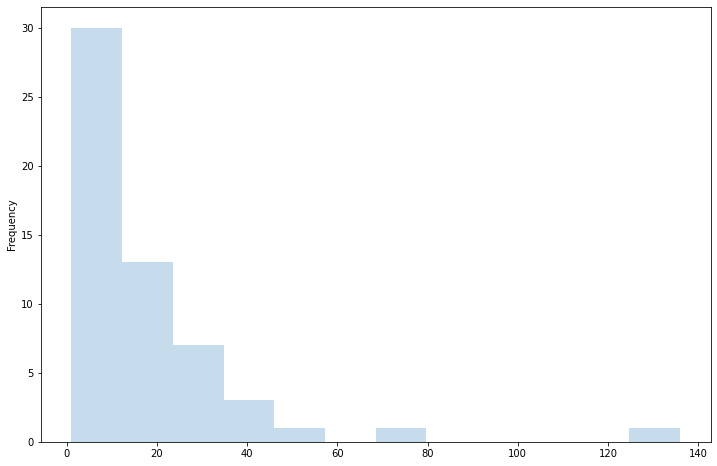

In [ ]:
new = df_data[df_data['Price']!=0]
new.Price.value_counts().plot.hist(bins=12, alpha=0.25,figsize=(12,8),grid=False)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

**Clean data for wrong name**



Get the name of countries into new collumn

In [5]:
df_data['Alpha3'] = df_data['Location'].apply(lambda x: x.split(',')[-1].strip())

Replace wrong name of the country which does not match with isopack

In [6]:

df_data['Alpha3']=df_data['Alpha3'].replace({'Russia' : 'Russian Federation'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'New Mexico' : 'USA'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Shahrud Missile Test Site' : 'Iran, Islamic Republic of'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Iran' : 'Iran, Islamic Republic of'})
df_data['Alpha3']=df_data['Alpha3'].replace({'Barents Sea' : 'Russian Federation'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Pacific Missile Range Facility' : 'Pacific Missile Range Facility'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Gran' : 'USA'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Yellow Sea' : 'China'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'Pacific Missile Range Facility' : 'USA'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'USA Canaria' : 'USA'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'North Korea' : 'Korea, Republic of'}, regex=True)

df_data['Alpha3']=df_data['Alpha3'].replace({'Pacific Ocean' : 'New Zealand'}, regex=True)
df_data['Alpha3']=df_data['Alpha3'].replace({'South Korea' : "Korea, Democratic People's Republic of"}, regex=True)



create new collum "country code" 

In [7]:
df_data['Country_code'] = df_data['Alpha3'].apply(lambda x: countries.get(f"{x}").alpha3)

df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


# Use a Choropleth Map to Show the Number of Failures by Country


create basic data for making the map

In [ ]:
fail = df_data[df_data['Mission_Status'] == "Failure"].groupby('Country_code').count()['Alpha3']
fail


Country_code
AUS      3
BRA      2
CHN     19
FRA     13
IND      8
IRN      8
ISR      2
JPN     10
KAZ     72
KOR      3
NZL      5
PRK      2
RUS     63
USA    129
Name: Alpha3, dtype: int64

create the map

In [ ]:

fig = px.choropleth(fail, locations=fail.index,
                    color=fail.values, # lifeExp is a column of gapminder
                    title='Number of Failures by Country')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

Checking data

In [ ]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,nan,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,nan,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,Kazakhstan,KAZ


Create the suitable information for making the chart

In [ ]:
sunburst = df_data.groupby(['Alpha3','Organisation'],as_index=False).agg({'Mission_Status':pd.Series.count})
sunburst

,Alpha3,Organisation,Mission_Status
0,Australia,AMBA,1
1,Australia,CECLES,3
2,Australia,RAE,2
3,Brazil,AEB,3
4,China,CASC,251
...,...,...,...
60,USA,SpaceX,100
61,USA,ULA,140
62,USA,US Air Force,161
63,USA,US Navy,17


Update the ploty for creating chart

In [ ]:
!pip install plotly==4.8.2

In [ ]:
fig =px.sunburst(
    sunburst,
    path=['Alpha3', 'Organisation'], values='Mission_Status'
)
fig.show(renderer="colab")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_data

Create table using for making chart by group the data by Organisation and mission status and add the Prices

In [ ]:
total_money = df_data.groupby(['Organisation','Mission_Status'],as_index=False).agg({'Price':pd.Series.sum})
total_money = total_money[total_money['Price']!=0]
total_money

In [ ]:
fig = px.bar(total_money,x='Organisation',y='Price',color = 'Mission_Status')
fig.update_layout(barmode='group')
fig.show()

Base on the chart NASA is the organisation has the highest costs

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,nan,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,nan,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,Kazakhstan,KAZ


In [ ]:
total_money_peroganisation = df_data.groupby(['Organisation'],as_index=False).agg({'Price':pd.Series.sum})
total_money_peroganisation

In [ ]:
fig = px.bar(total_money,x='Organisation',y='Price')
fig.update_layout(barmode='group')
fig.show()

# Chart the Number of Launches per Year

In [12]:
# convert date time
df_data['Date'] = pd.to_datetime(df_data['Date'])
#create new colummn named "year" using lambda
df_data['year'] = df_data['Date'].apply(lambda x: x.year)
#check data
df_data.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020


In [ ]:
number_lauches_per_year = df_data.groupby('year', as_index=False).agg({'Organisation':pd.Series.count})
number_lauches_per_year

,year,Organisation
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [ ]:
fig = px.bar(number_lauches_per_year,x='year',y='Organisation',color='Organisation',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Year',title="Number of Launches per Year")
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [13]:

#create new colummn named "month" using lambda
df_data['month'] = df_data['Date'].apply(lambda x: x.month)
#check data
df_data.head(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code,year,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8


In [ ]:
#create new column "month"
df_data['Date'] = pd.to_datetime(df_data['Date'],utc=True)
df_data['month_year'] = df_data['Date'].apply(lambda s: f'{s.month} - {s.year}')
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code,year,month,month_year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8,8 - 2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8,8 - 2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,nan,Success,USA,USA,2020,8,8 - 2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7,7 - 2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7,7 - 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,nan,Failure,USA,USA,1958,2,2 - 1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,nan,Success,USA,USA,1958,2,2 - 1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,USA,1957,12,12 - 1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,Kazakhstan,KAZ,1957,11,11 - 1957


In [ ]:
#create table
number_lauches_per_month = df_data.groupby(['month_year'], as_index=False).agg({'Organisation':pd.Series.count})
number_lauches_per_month

,month_year,Organisation
0,1 - 1959,1
1,1 - 1961,2
2,1 - 1962,3
3,1 - 1963,1
4,1 - 1964,3
...,...,...
742,9 - 2015,7
743,9 - 2016,7
744,9 - 2017,6
745,9 - 2018,8


In [ ]:
#create chart
fig = px.line(number_lauches_per_month, x='month_year', y="Organisation")
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Month - Year',title="Number of Launches per Month for each Year")
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
#create table
per_month = df_data.groupby(['month'], as_index=False).agg({'Organisation':pd.Series.count})
per_month

In [ ]:
#create chart
fig = px.bar(per_month,x='month',y='Organisation',color='Organisation',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Year',title="Number of Launches per Month")
fig.show()

In [ ]:
#it seems to be December is the best time for lauching 

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
#create table
price_per_year = df_data.groupby('year', as_index=False).agg({'Price':pd.Series.mean})
price_per_year

In [ ]:
#create chart
fig = px.bar(price_per_year,x='year',y='Price',color='year',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Year',title="Number of Launches per Year")
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
organ = df_data.groupby(['Organisation'],as_index=False).agg({'Mission_Status':pd.Series.count}).sort_values(['Mission_Status'])
organ = organ.sort_values('Mission_Status',ascending=False).head(10)
organ

,Organisation,Mission_Status
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
fig = px.bar(organ,x='Organisation',y='Mission_Status',color='Mission_Status',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Organisation',title="top 10 organisation")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [14]:
new_data = df_data[df_data['year']<1991]

new_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code,year,month
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22 07:28:00+00:00,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,Russian Federation,RUS,1990,12
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10 07:54:00+00:00,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,Russian Federation,RUS,1990,12
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04 00:48:00+00:00,Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,Kazakhstan,KAZ,1990,12
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,USA,USA,1990,12
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,USA,1990,12
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,11


In [ ]:
#check the shape of data
new_data.shape

(2548, 8)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
#create condition
ussr_vs_usa = new_data[(new_data['Country_code'] =='USA') |(new_data['Country_code'] =='RUS')]
ussr_vs_usa= ussr_vs_usa.groupby('Country_code',as_index=False).count()
ussr_vs_usa

,Country_code,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,year
0,RUS,1163,1163,1163,1163,1163,1163,1163,0,1163,1163,1163
1,USA,644,644,644,644,644,644,644,83,644,644,644


In [ ]:
fig = px.pie(ussr_vs_usa, values='Organisation', names='Country_code', title='Total number of launches of the USSR and the USA')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
ussr_vs_usa = new_data[(new_data['Country_code'] =='USA') |(new_data['Country_code'] =='RUS')]
ussr_vs_usa= ussr_vs_usa.groupby(['Country_code','year'],as_index=False).agg({'Organisation':pd.Series.count})
ussr_vs_usa

,Country_code,year,Organisation
0,RUS,1961,2
1,RUS,1962,8
2,RUS,1963,8
3,RUS,1964,8
4,RUS,1965,10
...,...,...,...
59,USA,1986,6
60,USA,1987,6
61,USA,1988,7
62,USA,1989,16


In [ ]:
fig = px.bar(ussr_vs_usa,x='year',y='Organisation',color='Country_code',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Year',title="Total Number of Launches Year-On-Year by the Two Superpowers")
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
ussr_vs_usa = new_data[(new_data['Country_code'] =='USA') |(new_data['Country_code'] =='RUS')]
ussr_vs_usa = ussr_vs_usa[ussr_vs_usa['Mission_Status']=='Failure']
ussr_vs_usa= ussr_vs_usa.groupby(['Country_code','year'],as_index=False).agg({'Mission_Status':pd.Series.count})
ussr_vs_usa

In [ ]:
fig = px.bar(ussr_vs_usa,x='year',y='Mission_Status',color='Country_code',)
fig.update_layout(barmode='group',yaxis_title = 'Number',xaxis_title = 'Year',title="Total Number of Launches Year-On-Year by the Two Superpowers")
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
#filter data
ussr_vs_usa = new_data[(new_data['Country_code'] =='USA') |(new_data['Country_code'] =='RUS')]

#create top
year1 = ussr_vs_usa.groupby(['year','Country_code','Mission_Status']).agg({'Alpha3': 'value_counts'})
year2 = year1.groupby(['year','Country_code','Mission_Status']).agg({'Alpha3': 'sum'})

#create bot
mission = ussr_vs_usa.groupby(['year',]).agg({'Alpha3':'value_counts'})
mission1 = mission.groupby(['year',]).agg({'Alpha3':'sum'})

#create div
line = year2.div(mission1, level='year') * 100

#reset index
line1 = line.reset_index()

#only get the mission status is failure
line1[line1['Mission_Status']=='Failure']
line1











In [122]:
#create chart
fig = px.line(line1, x='year', y="Alpha3", color = 'Country_code', title='Percentage of Failures over Time')
fig.show()



# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [126]:
df_data.head(3
             )

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Alpha3,Country_code,year,month,Count
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8,<bound method Series.count of 0 2020-08-...
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8,<bound method Series.count of 0 2020-08-...
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8,<bound method Series.count of 0 2020-08-...


In [137]:
top = df_data.groupby(['year','Country_code']).agg({'Count':'count'})
top = top.reset_index()
top

,year,Country_code,Count
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
...,...,...,...
422,2020,JPN,3
423,2020,KAZ,6
424,2020,NZL,3
425,2020,RUS,3


In [138]:
fig = px.scatter(top,x='year',y='Count',color='Country_code')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [139]:
top = df_data.groupby(['year','Organisation']).agg({'Count':'count'})
top = top.reset_index()
top

,year,Organisation,Count
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [136]:
fig = px.scatter(top,x='year',y='Count',color='Organisation')
fig.show()

In [140]:
#in 1970s and 1980, USSR in the leading of launching interms of total number of Launches 
#CASC is dominatant from 2018 to 2020!